# Case Study - German Credit Dataset 

Bank on receiving loan application, based on applicant’s profile, has to make a decision whether to approve the loan or not. 2 types of risks are associated with the bank’s decision:
- If the applicant has a good credit risk - likely to repay loan - not approving loan is a loss of business to bank
- If the applicant hass a bad credit risk - not likely to repay loan - approving loan results in a financial loss to bank
Applicant’s demographic & socio-economic profiles are studied by loan managers before granting loan.
German Credit Data contains data on 20 variables & the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

**Data dictionary - Business meaning of each column**

Attribute 1: (qualitative) Account_status
Status of existing checking account based on Debit Memorandum. Debit Memorandum notifies the customers about the debit adjustment.
1 : ... < 0 DM
2 : 0 <= ... < 200 DM
3 : ... >= 200 DM / salary assignments for at least 1 year
4 : no checking account

Attribute 2: (numerical) Duration_of_credit
 Duration of loan in months

Attribute 3: (qualitative) Payment_status_of_previous_credit
Credit history of the applicant
0 : no credits taken/all credits paid back duly
1 : all credits at this bank paid back duly
2 : existing credits paid back duly till now
3 : delay in paying off in the past
4 : critical account/other credits existing (not at this bank)

Attribute 4: (qualitative) Purpose
Purpose for the loan
0 : car (new)
1 : car (used)
2 : furniture/equipment
3 : radio/television
4 : others
5 : repairs
6 : education
7 : vacation
8 : business
9 : retraining
10 : domestic appliances

Attribute 5: (numerical) Credit_amount
Amount taken as loan

Attibute 6: (qualitative) Value_savings_stocks
Savings account and bonds
1 : ... < 100 DM
2 : 100 <= ... < 500 DM
3 : 500 <= ... < 1000 DM
4 : .. >= 1000 DM
5 : unknown/ no savings account

Attribute 7: (qualitative) Duration_of_current_employment
Number of years worked in the present job
1 : unemployed
2 : ... < 1 year
3 : 1 <= ... < 4 years
4 : 4 <= ... < 7 years
5 : .. >= 7 years

Attribute 8: (numerical) Instalment_percent
Installment rate in percentage of disposable income

Attribute 9: (qualitative) Marital_status_gender
Personal status and gender
1 : male : divorced/separated
2 : female : divorced/separated/married
3 : male : single
4 : male : married/widowed
5 : female : single

Attribute 10: (qualitative) Guarantors
Other debtors / guarantors for the applicant
1 : none
2 : co-applicant
3 : guarantor

Attribute 11: (numerical) Duration_in_current_address
Number of years lived at the present address

Attribute 12: (qualitative) Property 
Property type of applicant
A1 : real estate
2 : if not A121 : building society savings agreement/life insurance
3 : if not A121/A122 : car or other, not in attribute 6
4 : unknown / no property

Attribute 13: (numerical) Age
Age in years

Attribute 14: (qualitative) Concurrent_credits
Other installment plans
1 : bank
2 : stores
3 : none

Attribute 15: (qualitative) Housing
1 : rent
2 : own
3 : for free

Attribute 16: (numerical) No_of_credits_at_this_bank
Number of existing credits at this bank

Attribute 17: (qualitative) Occupation
1 : unemployed/ unskilled - non-resident
2 : unskilled - resident
3 : skilled employee / official
4 : management/ self-employed/highly qualified employee/ officer

Attribute 18: (numerical) No_of_dependents
Number of people being liable to provide maintenance for

Attribute 19: (qualitative) Telephone
Is the Telephone registered or not
1 : none
2 : yes, registered under the customers name

Attribute 20: (qualitative) foreign worker
Is the applicant a foreign worker
1 : yes
2 : no

Creditability
Whether the issued loan was a good decision or bad
1 = Good Credit Risk
0 = Bad Credit Risk

**Objective/ Aim/ Goal of the Study**
Predict if this loan credit would be a risk to the bank or not?
		           OR
If the loan amount is given to the applicant, will he/ she pay back or become a defaulter?

### Load the libraries

In [1]:
import warnings                                  # Supressing the warning messages
warnings.filterwarnings('ignore')
import pandas            as pd
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm 

from scipy                                  import stats
from scipy.cluster                          import hierarchy as sch
from sklearn.preprocessing                  import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection                import train_test_split, KFold, GridSearchCV
from sklearn.feature_selection              import RFE

from sklearn.linear_model                   import LinearRegression, LogisticRegression
from sklearn.neighbors                      import KNeighborsClassifier
from sklearn.tree                           import DecisionTreeClassifier
from sklearn.ensemble                       import RandomForestClassifier
from sklearn.ensemble                       import AdaBoostClassifier
from sklearn.cluster                        import KMeans, AgglomerativeClustering

from sklearn.metrics                        import r2_score, mean_squared_error, max_error, mean_absolute_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
from sklearn.metrics                        import roc_auc_score, classification_report, confusion_matrix, accuracy_score, silhouette_score

### Load dataset into Python Environment

In [2]:
# Read the dataset - German_Credit

gc = pd.read_excel(r"C:\Users\user\Desktop\coding\ML\ML Models\Regression\2022_ICSSR_ExcelWB_DataAnalysis.xls", sheet_name = 'German_Credit')
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_status                     1000 non-null   int64
 2   Duration_of_credit                 1000 non-null   int64
 3   Payment_status_of_previous_credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_amount                      1000 non-null   int64
 6   Value_savings_stocks               1000 non-null   int64
 7   Duration_of_current_employment     1000 non-null   int64
 8   Instalment_percent                 1000 non-null   int64
 9   Marital_status_gender              1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_current_address        1000 non-null   int64
 12  Property             

In [3]:
gc.head(20)

,Creditability,Account_status,Duration_of_credit,Payment_status_of_previous_credit,Purpose,Credit_amount,Value_savings_stocks,Duration_of_current_employment,Instalment_percent,Marital_status_gender,...,Duration_in_current_address,Property,Age,Concurrent_credits,Housing,No_of_credits_at_this_bank,Occupation,No_of_dependents,Telephone,Foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
5,1,1,10,4,0,2241,1,2,1,3,...,3,1,48,3,1,2,2,2,1,2
6,1,1,8,4,0,3398,1,4,1,3,...,4,1,39,3,2,2,2,1,1,2
7,1,1,6,4,0,1361,1,2,2,3,...,4,1,40,3,2,1,2,2,1,2
8,1,4,18,4,3,1098,1,1,4,2,...,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,2,...,4,4,23,3,1,1,1,1,1,1


### Frequency Distribution

In [4]:
# Frequency Distribution - value_counts()

#gc['Creditability'].value_counts()
gc.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

Creditability
0    300
1    700
dtype: int64


<AxesSubplot:xlabel='Creditability'>

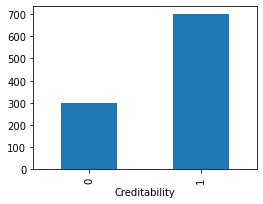

In [5]:
# Creating Bar chart as the Target variable (Creditability) is Categorical

GroupedData = gc.groupby('Creditability').size()
print(GroupedData)
GroupedData.plot(kind='bar', figsize=(4,3))

<AxesSubplot:>

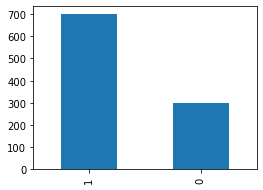

In [6]:
# same as above can be done using value_counts()
groupeddata1=gc.Creditability.value_counts()
groupeddata1.plot(kind='bar', figsize=(4,3))

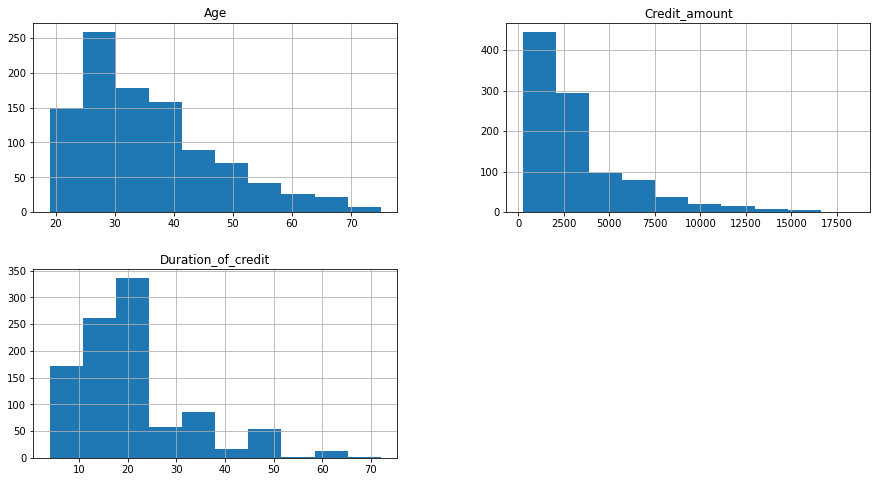

In [8]:
# Plotting histograms of multiple columns together 

gc.hist(['Age', 'Credit_amount','Duration_of_credit'], figsize=(15,8))
plt.show()

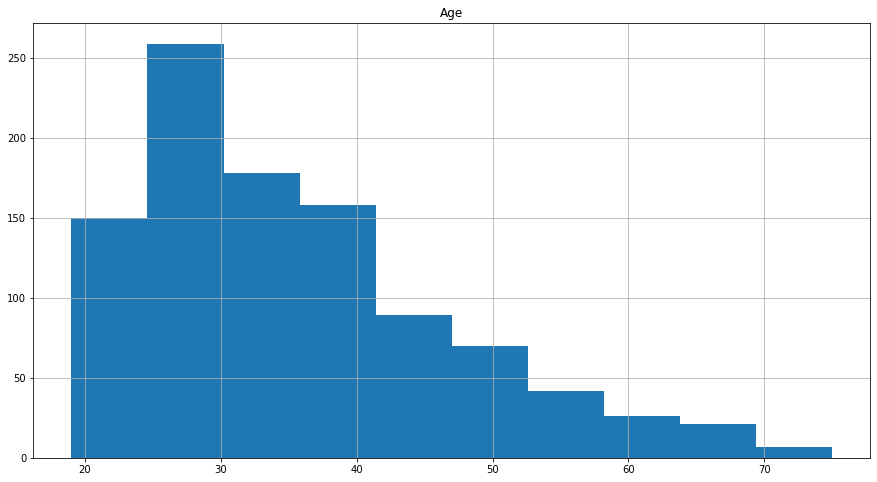

In [9]:
gc.hist(['Age'], figsize=(15,8))
plt.show()

### Contingency Table

In [7]:
# Contingency Table - crosstable()

CT = pd.crosstab(index=gc.Creditability, columns=[gc.Foreign_worker,gc.Guarantors])
print(CT)

Foreign_worker    1           2      
Guarantors        1   2   3   1  2  3
Creditability                        
0               270  18   8   2  0  2
1               611  19  37  24  4  5


In [10]:
# checking whether there is relation between creditability and guarantors using chi_square test of independence
# H0 = There is no relation(Independent)
# H1 = There is relation(Dependent)
from scipy.stats import chi2_contingency
CT = pd.crosstab(gc.Creditability, gc['Guarantors'])
print(CT)
stat, p, dof, expected = chi2_contingency(CT)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Guarantors       1   2   3
Creditability             
0              272  18  10
1              635  23  42
p value is 0.036055954027247206
Dependent (reject H0)


In [11]:
# chi_ square test of independence gives 4 values which are - Chi-square, P-value, DOF and expected values
from scipy.stats import chi2_contingency
CT = pd.crosstab(gc.Creditability, gc['Guarantors'])
print(CT)
chi2_contingency(CT)

Guarantors       1   2   3
Creditability             
0              272  18  10
1              635  23  42


(6.645366537264244,
 0.036055954027247206,
 2,
 array([[272.1,  12.3,  15.6],
        [634.9,  28.7,  36.4]]))

In [12]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_status                     1000 non-null   int64
 2   Duration_of_credit                 1000 non-null   int64
 3   Payment_status_of_previous_credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_amount                      1000 non-null   int64
 6   Value_savings_stocks               1000 non-null   int64
 7   Duration_of_current_employment     1000 non-null   int64
 8   Instalment_percent                 1000 non-null   int64
 9   Marital_status_gender              1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_current_address        1000 non-null   int64
 12  Property             

### Data Pre-processing/ Cleansing

1. Outlier treatment
   - Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the        histogram
   - Outlier must be treated one column at a time. As the treatment will be slightly different for each column
   - Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from      majority of the data
   - 2 options to treat outliers in the data:
     * Option-1: Delete outlier records, if there are just few rows
     * Option-2: Impute the outlier values with a logical business value

2. Missing values treatment
   - Missing values are treated for each column separately
   - If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected          because too much information is missing
   - Options for treating missing values in data:
     * Delete the missing value rows if there are only few records
     * Impute the missing values with MEDIAN value for continuous variables
     * Impute the missing values with MODE value for categorical variables
     * Interpolate the values based on nearby values
     * Interpolate the values based on business logic 
     
3. Feature Selection
   - To choose the best columns(Features) which are correlated to the Target variable - Measure correlation values or ANOVA/        Chi-Square tests
   - However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a        better sense of data

4. One-hot encoding
   - OneHot Encoding & Label Encoding are 2 methods for encoding the categorical columns into numerical columns, which are part      of Scikit-Learn Python library
   - One-hot encoding as a tool that tightens feature vectors. It looks at each feature and identifies the total number of          distinct values. It uses a one-of-k scheme to encode values. Each feature in the feature vector is encoded based on this        scheme. This helps us to be more efficient in terms of space
   - preprocessing.OneHotEncoder() function - encodes categorical integer features as a one-hot numeric array
   - transform() function - transform the data array using one-hot encoding

5. Label encoding
   - In supervised learning, we usually deal with a variety of labels. These can be either numbers or words. If they are            numbers, then the algorithm can use them directly. However, labels often need to be in a human-readable form. So, people        usually label the training data with words
   - Label encoding is a simple and straight forward approach. This converts each value in a categorical column into a              numerical value. Each value in a categorical column is called Label
   - Label encoding refers to transforming word labels into a numerical form so that algorithms can understand how to operate        on them
   - preprocessing.LabelEncoder()function - Transforms word labels into numerical form
   - inverse_transform() function - To transform labels back to their original encoding

In [13]:
gc['Creditability']                     = gc['Creditability'].astype('object')
gc['Account_status']                    = gc['Account_status'].astype('object')
gc['Payment_status_of_previous_credit'] = gc['Payment_status_of_previous_credit'].astype('object')
gc['Purpose']                           = gc['Purpose'].astype('object')
gc['Value_savings_stocks']              = gc['Value_savings_stocks'].astype('object')
gc['Marital_status_gender']             = gc['Marital_status_gender'].astype('object')
gc['Guarantors']                        = gc['Guarantors'].astype('object')
gc['Property']                          = gc['Property'].astype('object')
gc['Concurrent_credits']                = gc['Concurrent_credits'].astype('object')
gc['Housing']                           = gc['Housing'].astype('object')
gc['Occupation']                        = gc['Occupation'].astype('object')
gc['Telephone']                         = gc['Telephone'].astype('object')
gc.Foreign_worker                       = gc.Foreign_worker.astype('object')
gc["Instalment_percent"]                         = gc['Instalment_percent'].astype('object')
gc['Duration_in_current_address']                         = gc['Duration_in_current_address'].astype('object')
gc['No_of_credits_at_this_bank']                         = gc['No_of_credits_at_this_bank'].astype('object')
gc['No_of_dependents']                         = gc['No_of_dependents'].astype('object')

In [14]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Creditability                      1000 non-null   object
 1   Account_status                     1000 non-null   object
 2   Duration_of_credit                 1000 non-null   int64 
 3   Payment_status_of_previous_credit  1000 non-null   object
 4   Purpose                            1000 non-null   object
 5   Credit_amount                      1000 non-null   int64 
 6   Value_savings_stocks               1000 non-null   object
 7   Duration_of_current_employment     1000 non-null   int64 
 8   Instalment_percent                 1000 non-null   object
 9   Marital_status_gender              1000 non-null   object
 10  Guarantors                         1000 non-null   object
 11  Duration_in_current_address        1000 non-null   object
 12  Propert

##### One-hot Encoding

In [15]:
gc1= pd.get_dummies(gc, columns=['Creditability', 'Account_status', 
       'Payment_status_of_previous_credit', 'Purpose', 
       'Value_savings_stocks', 'Duration_of_current_employment',
       'Instalment_percent', 'Marital_status_gender', 'Guarantors',
       'Duration_in_current_address', 'Property',  'Concurrent_credits',
       'Housing', 'No_of_credits_at_this_bank', 'Occupation',
       'No_of_dependents', 'Telephone', 'Foreign_worker'],drop_first=True)
gc1.head()

,Duration_of_credit,Credit_amount,Age,Creditability_1,Account_status_2,Account_status_3,Account_status_4,Payment_status_of_previous_credit_1,Payment_status_of_previous_credit_2,Payment_status_of_previous_credit_3,...,Housing_3,No_of_credits_at_this_bank_2,No_of_credits_at_this_bank_3,No_of_credits_at_this_bank_4,Occupation_2,Occupation_3,Occupation_4,No_of_dependents_2,Telephone_2,Foreign_worker_2
0,18,1049,21,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9,2799,36,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,12,841,23,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,12,2122,39,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
4,12,2171,38,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


Label Encoding

gc['Creditability']                     = LabelEncoder().fit_transform(gc['Creditability'])
gc['Account_balance']                   = LabelEncoder().fit_transform(gc['Account_balance'])
gc['Payment_status_of_previous_credit'] = LabelEncoder().fit_transform(gc['Payment_status_of_previous_credit'])
gc['Purpose']                           = LabelEncoder().fit_transform(gc['Purpose'])
gc['Value_savings_stocks']              = LabelEncoder().fit_transform(gc['Value_savings_stocks'])
gc['Length_of_current_employment']      = LabelEncoder().fit_transform(gc['Length_of_current_employment'])
gc['Instalment_percent']                = LabelEncoder().fit_transform(gc['Instalment_percent'])
gc['Marital_status']                    = LabelEncoder().fit_transform(gc['Marital_status'])
gc['Guarantors']                        = LabelEncoder().fit_transform(gc['Guarantors'])
gc['Duration_in_current_address']       = LabelEncoder().fit_transform(gc['Duration_in_current_address'])
gc['Valuable_assets_available']         = LabelEncoder().fit_transform(gc['Valuable_assets_available'])
gc['Concurrent_credits']                = LabelEncoder().fit_transform(gc['Concurrent_credits'])
gc['Type_of_apartment']                 = LabelEncoder().fit_transform(gc['Type_of_apartment'])
gc['No_of_credits_at_this_bank']        = LabelEncoder().fit_transform(gc['No_of_credits_at_this_bank'])
gc['Occupation']                        = LabelEncoder().fit_transform(gc['Occupation'])
gc['No_of_dependents']                  = LabelEncoder().fit_transform(gc['No_of_dependents'])
gc['Telephone']                         = LabelEncoder().fit_transform(gc['Telephone'])
gc['Foreign_worker']                    = LabelEncoder().fit_transform(gc['Foreign_worker'])

gc

In [16]:
# Standard Scaling (Standardization)
gc2=gc[['Duration_of_credit','Credit_amount','Age','Duration_of_current_employment']]
standardizer = StandardScaler()
gc2 = pd.DataFrame(standardizer.fit_transform(gc2))
gc2.columns=[  'Duration_of_credit',
               'Credit_amount',  
               'Age',
               'Duration_of_current_employment']
gc2.head()

,Duration_of_credit,Credit_amount,Age,Duration_of_current_employment
0,-0.240857,-0.787657,-1.281573,-1.145978
1,-0.987573,-0.167384,0.040363,-0.317959
2,-0.738668,-0.861381,-1.105315,0.510060
3,-0.738668,-0.407341,0.304750,-0.317959
4,-0.738668,-0.389974,0.216621,-0.317959


In [17]:
# Check the number of unique values in each column

gc.nunique()

Creditability                          2
Account_status                         4
Duration_of_credit                    33
Payment_status_of_previous_credit      5
Purpose                               10
Credit_amount                        923
Value_savings_stocks                   5
Duration_of_current_employment         5
Instalment_percent                     4
Marital_status_gender                  4
Guarantors                             3
Duration_in_current_address            4
Property                               4
Age                                   53
Concurrent_credits                     3
Housing                                3
No_of_credits_at_this_bank             4
Occupation                             4
No_of_dependents                       2
Telephone                              2
Foreign_worker                         2
dtype: int64

In [18]:
# Check for duplicate values in the dataset

gc.duplicated().sum()

0

In [19]:
# Check for missing values in the dataset

gc.isnull().sum()                                           # Count of missing values
#round(gc.isnull().sum() / gc.isnull().count() * 100, 2)    # Percentage of missing values

Creditability                        0
Account_status                       0
Duration_of_credit                   0
Payment_status_of_previous_credit    0
Purpose                              0
Credit_amount                        0
Value_savings_stocks                 0
Duration_of_current_employment       0
Instalment_percent                   0
Marital_status_gender                0
Guarantors                           0
Duration_in_current_address          0
Property                             0
Age                                  0
Concurrent_credits                   0
Housing                              0
No_of_credits_at_this_bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_worker                       0
dtype: int64

In [20]:
# Check for NULL values in the dataset

gc.isna().sum()

Creditability                        0
Account_status                       0
Duration_of_credit                   0
Payment_status_of_previous_credit    0
Purpose                              0
Credit_amount                        0
Value_savings_stocks                 0
Duration_of_current_employment       0
Instalment_percent                   0
Marital_status_gender                0
Guarantors                           0
Duration_in_current_address          0
Property                             0
Age                                  0
Concurrent_credits                   0
Housing                              0
No_of_credits_at_this_bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_worker                       0
dtype: int64

In [21]:
# select columns with numerical data types

num_df = gc.select_dtypes(include=['int64', 'float64']).columns
subset = gc[num_df]

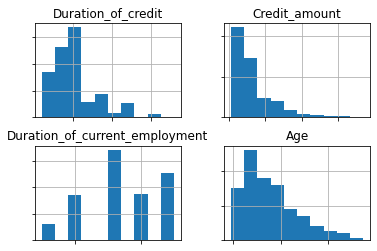

<Figure size 1080x576 with 0 Axes>

In [22]:
# create a histogram plot for each numeric variable

ax = subset.hist()
for axis in ax.flatten():                   # disable axis labels to avoid the clutter
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.figure(figsize=(15,8))
plt.show()

**Visual exploration of relationship between variables**
1. Continuous Vs Continuous ---- Scatter Plot
2. Categorical Vs Continuous---- Box Plot
3. Categorical Vs Categorical---- Grouped Bar Plots

**Statistical measurement of relationship strength between variables**
1. Continuous Vs Continuous ---- Correlation matrix
2. Categorical Vs Continuous---- ANOVA test
3. Categorical Vs Categorical--- Chi-Square test

#### EDA - Graphical Methods 

**Uni-variate plots**
  1. countplot() - Plot Categorical feature                         
                   Favorite_Game, Favorite_Channel_of_Transaction  
     
  2. distplot() - Plot Numerical feature                          
                  Frequency_of_Playing
     
**Bi-variate plots**
  3. lmplot() - Plot Numeric vs. Numeric features       
                x = 'No_of_Units_Purchased', y = 'Total_Revenue_Generated'
     
  4. boxplot() - Plot Numeric vs. Categorical features  
       
**Multi-variate plots**
  5. heatmap()
  6. pairplot()

In [23]:
gc.columns

Index(['Creditability', 'Account_status', 'Duration_of_credit',
       'Payment_status_of_previous_credit', 'Purpose', 'Credit_amount',
       'Value_savings_stocks', 'Duration_of_current_employment',
       'Instalment_percent', 'Marital_status_gender', 'Guarantors',
       'Duration_in_current_address', 'Property', 'Age', 'Concurrent_credits',
       'Housing', 'No_of_credits_at_this_bank', 'Occupation',
       'No_of_dependents', 'Telephone', 'Foreign_worker'],
      dtype='object')

<AxesSubplot:xlabel='Creditability', ylabel='count'>

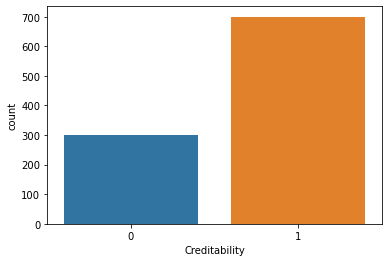

In [24]:
# countplot() - Plot Categorical feature 

sns.countplot(x = "Creditability", data = gc)  

<AxesSubplot:xlabel='Creditability', ylabel='count'>

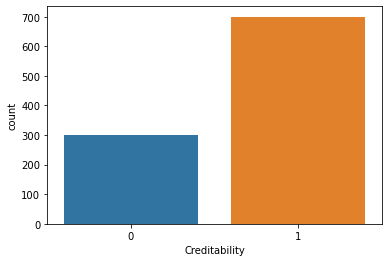

In [25]:
sns.countplot(gc.Creditability)  

<AxesSubplot:xlabel='Credit_amount', ylabel='Density'>

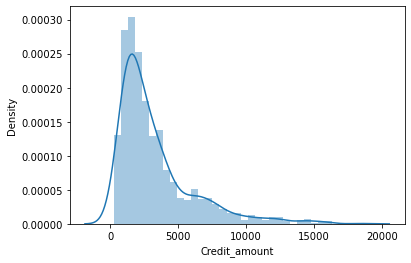

In [26]:
# distplot() function - Plot Numerical continuous feature 

sns.distplot(gc.Credit_amount)     

**Interpretation**

It is a positively skewed distribution

In [27]:
#Association between Age vs. Credit_amount
np.corrcoef(gc.Credit_amount,gc.Age)

array([[1.        , 0.03227268],
       [0.03227268, 1.        ]])

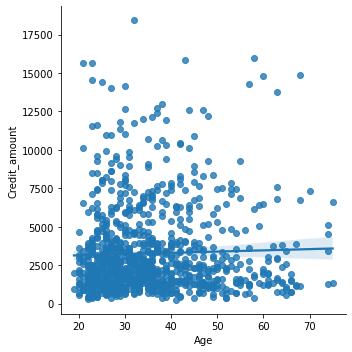

In [28]:
# lmplot() - Plot Numeric vs. Numeric features 
# Age vs. Credit_amount

sns.lmplot(x = 'Age', y = 'Credit_amount', data = gc)

**Interpretation**

- There is week association association between Age and Credit_amount

<AxesSubplot:xlabel='Creditability', ylabel='Duration_of_credit'>

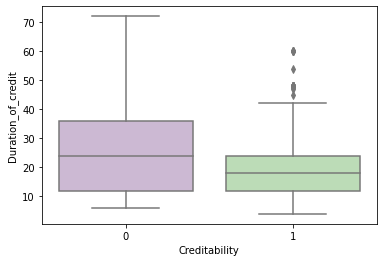

In [29]:
# boxplot() function - Plot Numeric vs. Categorical features 
# Creditability vs Duration of credit
sns.boxplot(x = 'Creditability', y = 'Duration_of_credit', data = gc, palette="PRGn")

**Interpretation**

-   Maximum duration of repaying for Good Credit risk is 40 months and average is 15 months.
-   Outlier values are observed in Good Credit risk
-   More than 40 months has Bad credit risk

### Descriptive Analysis / Exploratory Data Analysis

In [30]:
# Measures of central tendency     - mean(), median(), mode()
# Measures of dispersion           - std(), var()
# Measures of skewness & kurtosis  - skew(), kurtosis()
# Done for Age
print ('Mean               :', sp.mean(gc.Age))
print ('Median             :', sp.median(gc.Age))
print ('Mode               :', sp.stats.mode(gc.Age))
print ('Standard Deviation :', sp.std(gc.Age))
print ('Variance           :', sp.var(gc.Age))
print ('Skewness           :', sp.stats.skew(gc.Age))
print ('Kurtosis           :', sp.stats.kurtosis(gc.Age))

Mean               : 35.542
Median             : 33.0
Mode               : ModeResult(mode=array([27], dtype=int64), count=array([50]))
Standard Deviation : 11.346992376837132
Variance           : 128.754236
Skewness           : 1.023174316054808
Kurtosis           : 0.6114371688367677


### describe() - Exploratory Data Analysis  
    
- Function for Exploratory Analysis or Descriptive/ Summary Statistics 
- describe(include='all')      - Summary statistics for both numeric/ categorical data items/ features
- describe()                   - Default EDA - Calculates summary statistics for numerical features
                                 count, mean, standard deviation, minimum, maximum, 25%, 50%, 75% quantiles
- describe(include=['object']) - Summary statistics for categorical columns (object data type) 
                                 count, unique, top, frequency 
                                 
data.describe(include='all')        # EDA for numeric & categorical features too
data.describe(include=['int64'])    # EDA for int64 features
data.describe(include=['float64'])  # EDA for float64 features 
data.describe()                     # EDA for numeric features only 
data.describe(include=['object'])   # EDA for categorical features

In [31]:
# Describes only numeric values

gc.describe()

,Duration_of_credit,Credit_amount,Duration_of_current_employment,Age
count,1000.000000,1000.00000,1000.000000,1000.00000
mean,20.903000,3271.24800,3.384000,35.54200
std,12.058814,2822.75176,1.208306,11.35267
min,4.000000,250.00000,1.000000,19.00000
25%,12.000000,1365.50000,3.000000,27.00000
50%,18.000000,2319.50000,3.000000,33.00000
75%,24.000000,3972.25000,5.000000,42.00000
max,72.000000,18424.00000,5.000000,75.00000


In [32]:
gc.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_of_credit,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Credit_amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Duration_of_current_employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


In [33]:
#gc.describe().T

# EDA for entire data

gc.describe(include='all')

,Creditability,Account_status,Duration_of_credit,Payment_status_of_previous_credit,Purpose,Credit_amount,Value_savings_stocks,Duration_of_current_employment,Instalment_percent,Marital_status_gender,...,Duration_in_current_address,Property,Age,Concurrent_credits,Housing,No_of_credits_at_this_bank,Occupation,No_of_dependents,Telephone,Foreign_worker
count,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.00000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,1000.0,1000.00000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
unique,2.0,4.0,NaN,5.0,10.0,NaN,5.0,NaN,4.0,4.0,...,4.0,4.0,NaN,3.0,3.0,4.0,4.0,2.0,2.0,2.0
top,1.0,4.0,NaN,2.0,3.0,NaN,1.0,NaN,4.0,3.0,...,4.0,3.0,NaN,3.0,2.0,1.0,3.0,1.0,1.0,1.0
freq,700.0,394.0,NaN,530.0,280.0,NaN,603.0,NaN,476.0,548.0,...,413.0,332.0,NaN,814.0,714.0,633.0,630.0,845.0,596.0,963.0
mean,NaN,NaN,20.903000,NaN,NaN,3271.24800,NaN,3.384000,NaN,NaN,...,NaN,NaN,35.54200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,12.058814,NaN,NaN,2822.75176,NaN,1.208306,NaN,NaN,...,NaN,NaN,11.35267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,4.000000,NaN,NaN,250.00000,NaN,1.000000,NaN,NaN,...,NaN,NaN,19.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,12.000000,NaN,NaN,1365.50000,NaN,3.000000,NaN,NaN,...,NaN,NaN,27.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,18.000000,NaN,NaN,2319.50000,NaN,3.000000,NaN,NaN,...,NaN,NaN,33.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,24.000000,NaN,NaN,3972.25000,NaN,5.000000,NaN,NaN,...,NaN,NaN,42.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Diagnostic Analytics - Correlation

1. Variance           - Refers to spread of data. Used to identify how far each observation in the dataset is from the mean.                           Large variance means that the observations in the dataset are far from mean & each other. Small                                 variance means that the observations are closer together in value
2. Standard Deviation - Measures the dispersion of a dataset relative to its mean & is calculated as the square root of the                             variance
3. Covariance         - Provides insight into how 2 variables are related. More precisely, refers to the measure of how two                             random variables in a data set will change together
                        * Positive covariance - 2 variables are positively related, & they move in the same direction
                        * Negative covariance - 2 variables are inversely related, & they move in opposite directions
4. Correlation        - Measures both direction and strength of association between the features of our interest. In addition                           to measuring direction of association between the variables (positively or inversely related),                                 measuring the strength of association between the variables is equally important

1) Correlation coefficient is denoted by r
      - If [r=1], features have a perfect positive correlation i.e., if one variable moves a given amount, the second moves             proportionally in the same direction
      - If [r=0], no relationship exists between the features. If one variable moves, you can make no predictions about the             movement of the other variable; they are uncorrelated
      - If [r=–1], the variables are perfectly negatively correlated (or inversely correlated) & move in opposition to each             other. If one variable increases, the other variable decreases proportionally
   
2) Measuring correlation graphically using scatter_matrix() & heatmap() functions
      - Correlation = 0  - No relationship exists between the features 
      - Correlation = 1  - Perfect positive relationship 
      - Correlation = -1 - Perfect negative relationship

####                      strong negative                               weak negative                       weak positive                              strong positive
#        -1 -------------------- -0.5 ----------------------0-------------------- 0.5 ----------------------- 1
#### Perfect Negative                           Moderate                                          No                                      Moderate                      Perfect Positive
#### correlation                                    correlation                                  correlation                              correlation                        correlation

**Diagnostic Analysis - Correlation in Python**

1. corr()           - Karl Pearson's Coefficient of Correlation
                    - Selects only numeric features for further analysis
                    - num_feature - Set of numeric features - int64 or float64 - 12 features (11 are int64 & 1 is float64)

2. scatter()        - Graphically plot 2 variables
                    - Plot independent variable on x-axis & dependent variable on y-axis
                    - Limitation - Only 2 variables can be plotted

3. scatter_matrix() - diagonal - kde  = kernel density estimation
                               - hist = histogram
                                          
4. Pairplot()       - Measures association between muliptle features                

5. heatmap()        - Measures association between muliptle features

In [34]:
# Diagnostic Analysis - corr() - Create correlation matrix - Karl Pearson's Coefficient of Correlation (r)

gc.corr()

,Duration_of_credit,Credit_amount,Duration_of_current_employment,Age
Duration_of_credit,1.000000,0.624988,0.057381,-0.037550
Credit_amount,0.624988,1.000000,-0.008376,0.032273
Duration_of_current_employment,0.057381,-0.008376,1.000000,0.259116
Age,-0.037550,0.032273,0.259116,1.000000


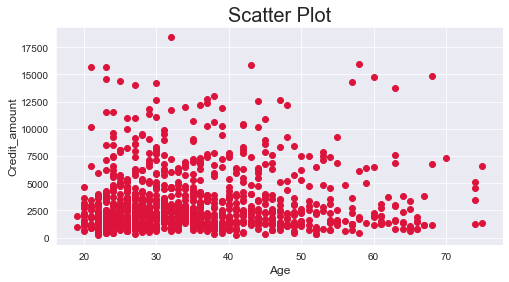

In [35]:
# scatter() - Graphically plot 2 variables/ features (Age vs. Credit_amount) 

plt.figure(figsize=(8,4))                             # Change image size
sns.set_style('darkgrid')                             # Set background

plt.scatter(x = gc.Age,y = gc.Credit_amount,color='crimson') # Create scatterplot

plt.title('Scatter Plot',fontsize = 20)               # Title of the chart
plt.xlabel('Age',fontsize = 12)        # Name x-axis
plt.ylabel('Credit_amount',fontsize = 12)           # Name y-axis
plt.show()

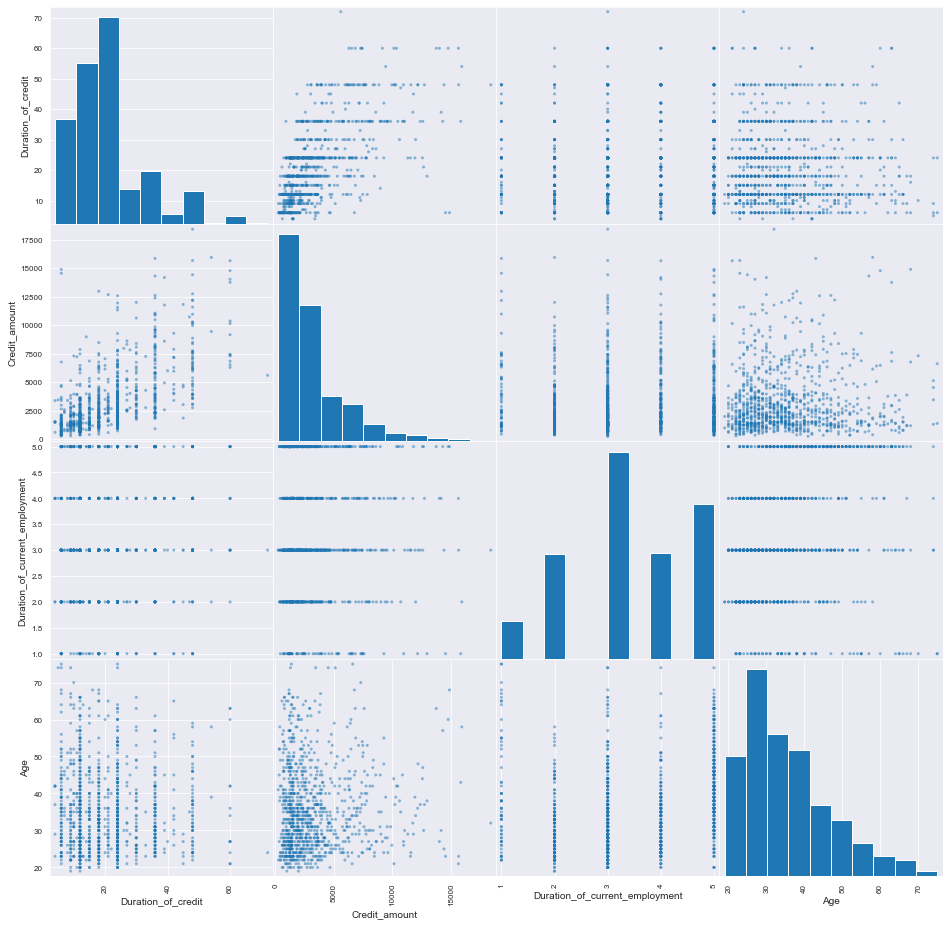

In [36]:
# 3. scatter_matrix() - diagonal - kde  = kernel density estimation - hist = histogram

pd.plotting.scatter_matrix(gc, figsize=(16, 16), diagonal='hist')
plt.show()

In [37]:
gc.Creditability.unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: object>

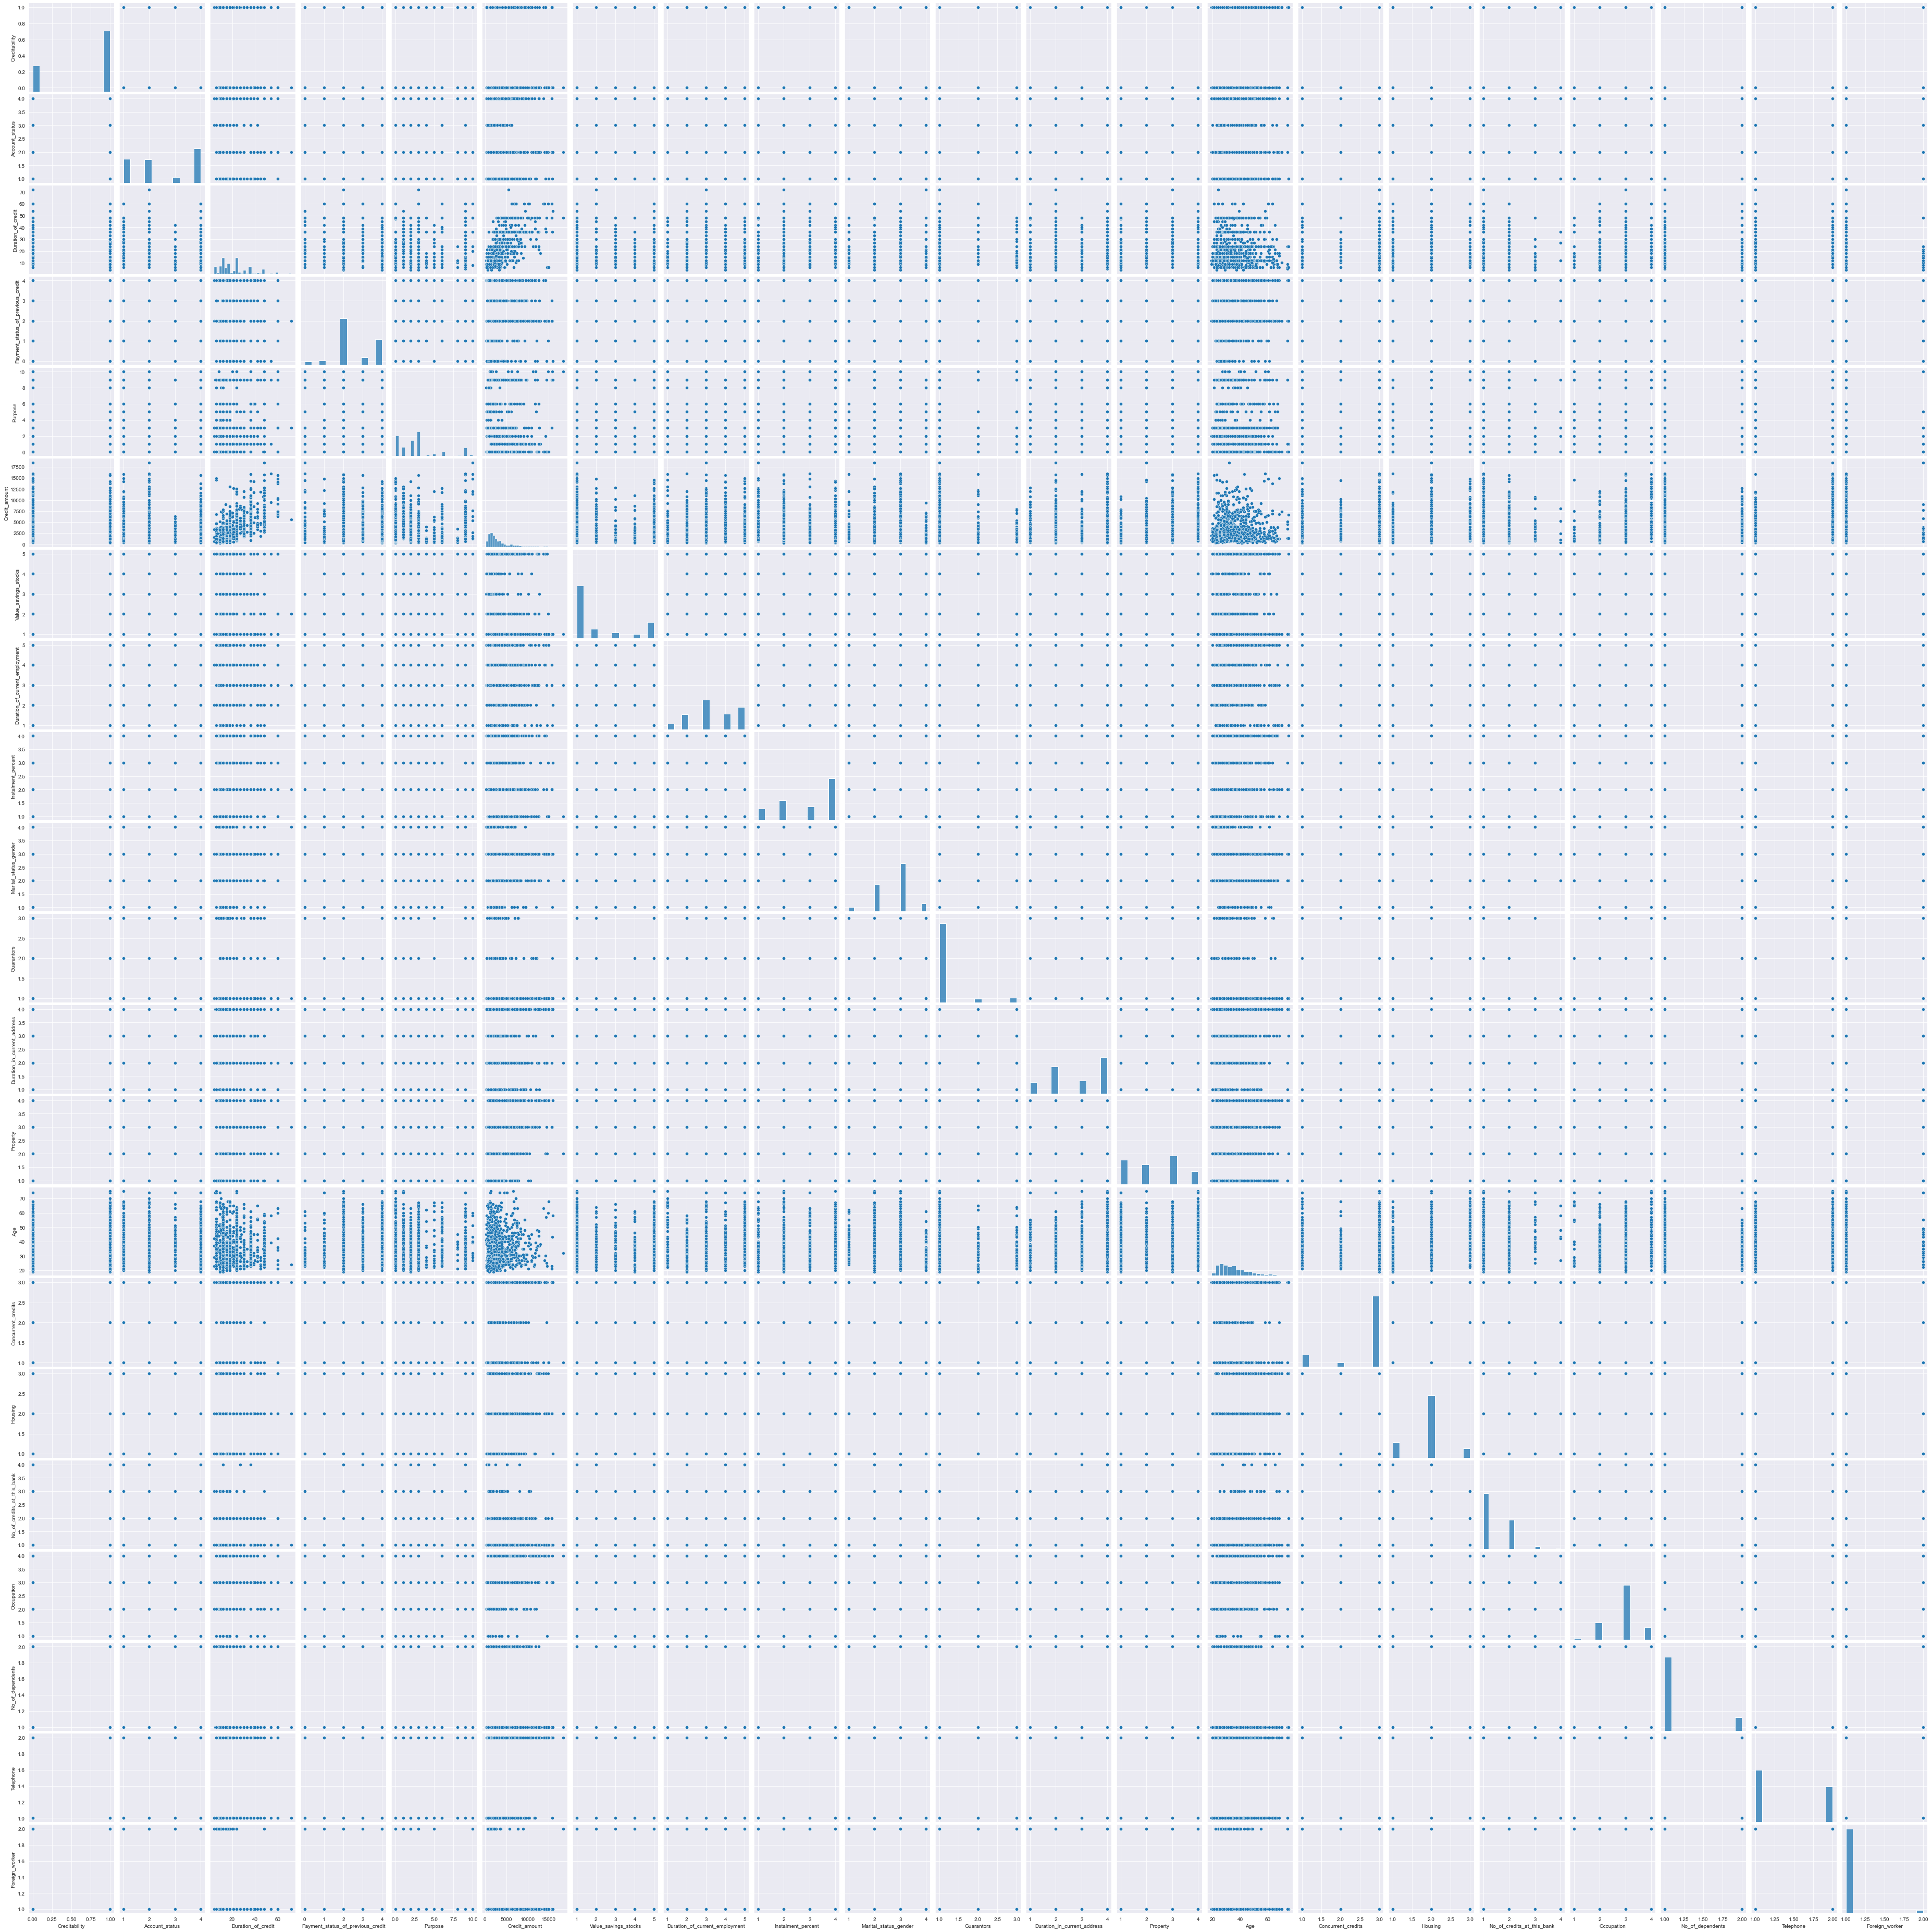

In [38]:
# 4. Pairplot() - Measures association between multiple features

sns.pairplot(gc)

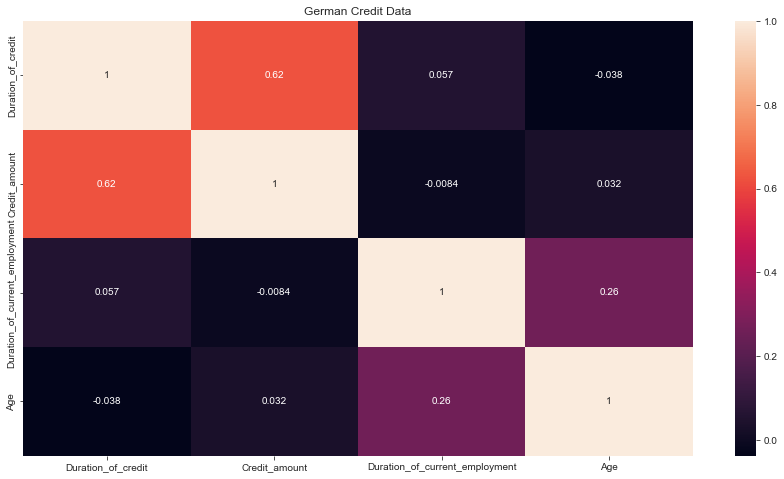

In [39]:
# 5. heatmap() - Measures association between muliptle features

plt.figure(figsize=(15,8))
sns.set_style('ticks')

sns.heatmap(gc.corr(), annot=True)

plt.title('German Credit Data')
plt.show()

<AxesSubplot:>

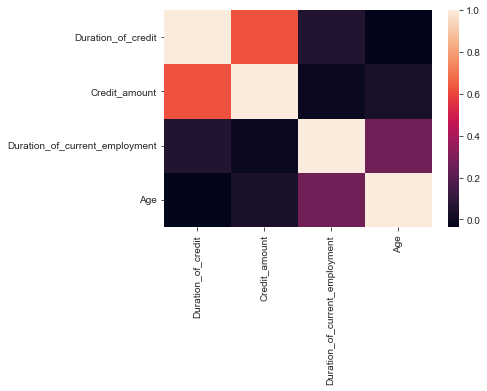

In [40]:
sns.heatmap(gc.corr())

In [41]:
gc.corr().style.background_gradient(cmap='coolwarm')

,Duration_of_credit,Credit_amount,Duration_of_current_employment,Age
Duration_of_credit,1.000000,0.624988,0.057381,-0.037550
Credit_amount,0.624988,1.000000,-0.008376,0.032273
Duration_of_current_employment,0.057381,-0.008376,1.000000,0.259116
Age,-0.037550,0.032273,0.259116,1.000000


### Simple & Multiple Linear Regression Model

##### Training a Linear Regression Model

- First split data into train dataset & test/ validation dataset
- Split data into an array X (contains input features to train model) and an array y (contains target   variable)
- In this case study, Price column - Target feature/ variable
- Remove Address column as it comprises only of textual info, which is irrelevant in developing the linear regression model

In [42]:
gc.columns

Index(['Creditability', 'Account_status', 'Duration_of_credit',
       'Payment_status_of_previous_credit', 'Purpose', 'Credit_amount',
       'Value_savings_stocks', 'Duration_of_current_employment',
       'Instalment_percent', 'Marital_status_gender', 'Guarantors',
       'Duration_in_current_address', 'Property', 'Age', 'Concurrent_credits',
       'Housing', 'No_of_credits_at_this_bank', 'Occupation',
       'No_of_dependents', 'Telephone', 'Foreign_worker'],
      dtype='object')

In [43]:
import statsmodels.api as sm 

X = sm.add_constant(gc['Age']) 
X.head()

,const,Age
0,1.0,21
1,1.0,36
2,1.0,23
3,1.0,39
4,1.0,38


In [44]:
# BoxOfficeCollection (Y) - Outcome/ dependent Variable(Y)

Y = gc['Credit_amount'] 
Y.head()

0    1049
1    2799
2     841
3    2122
4    2171
Name: Credit_amount, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split 

trainX, testX, trainY, testY = train_test_split(X , Y, train_size = 0.8, random_state = 100)  # Split the dataset into training (80) and validation (20) sub-sets
print("Input attributes X - Train dataset :", trainX.shape)
print("Input attributes X - Test dataset  :", testX.shape)
print("Output attribute y - Train dataset :", trainY.shape)
print("Output attribute y - Test dataset  :", testY.shape)

Input attributes X - Train dataset : (800, 2)
Input attributes X - Test dataset  : (200, 2)
Output attribute y - Train dataset : (800,)
Output attribute y - Test dataset  : (200,)


In [46]:
#  Build the model on training dataset  - yhat = a + bx - OLS - Ordinary Least Squares Principle - statsmodels package

import statsmodels.api as sm 

slm = sm.OLS(trainY, trainX).fit() 

In [47]:
# Print estimated parameters and interpret the results

print(slm.params) 

const    3067.965162
Age         9.225568
dtype: float64


**Interpretation**

- Estimated equation of straight line = a + bx
                  Credit_amount = 3067.965162 + 9.225568 x                

- R-Squared - Lies between 0 & 1. Higher R-Squared indicates better fit. Ideal value of R2 should be 1 
- Adjusted R2 - Should be a bit less than the R-Squared value (1)
- No. Observations - Total number of observations used for building this model 
- Regression coefficient (β1) - Captures the existence of linear relationship between the outcome variable & the feature
  *  H0: β1 = 0 - There is no statistically significant linear relationship between the 2 variables (outcome variable & the                       feature)
  *  H1: β1 ≠ 0 - There is statistically significant linear relationship between the 2 variables (outcome variable & the                         feature)
- p-value of t-test - If p-value for t-test > level of significance (say 0.05 or 0.01 ) then t-statistic is insignificant
- F Statistic - Checks the overall validity of regression model in the case of multiple linear regression model with k features
  * H0: β1 = β2 = ... = βk = 0 - There is no statistically significant linear relationship between the variables
  * H1: β1 ≠ β2 ≠ ... ≠ βk ≠ 0 - There is statistically significant linear relationship between the variables
- If p-value for F Statistic > level of significance (say 0.05 or 0.01) then F-statistic is insignificant. Stay away from that   model since it will not be able to confidently comment on the R² values
- Prob(F-statistics) - Depicts the probability of null hypothesis being true 

**Normality**
- AIC (Akaike Information Criterion) & BIC (Bayesian Information Criterion) - Quality of statistical methods can be measured by   Information Criteria (IC) with some score. Lowest the score, best the model
- Standard Error (SE) – If SE is low, then it indicates model’s quality to be good
- Omnibus (Checks for Normality assumption) - Test of skewness & kurtosis of the residual. We’re looking at the distribution of   the residual 
  Null Hypothesis - Errors are normally distributed. Value close to zero would indicate normal distribution
- Prob(Omnibus) - Performs a statistical test indicating the probability that the residuals are normally distributed. If         Prob(Omnibus) is close to 1 then the residuals are normally distributed, satisfying OLS assumption
- Jarque-Bera (JB)/ Prob(JB) (Checks for Normality assumption) – Another test for skewness (S) & kurtosis (K). This test         confirms results of Omnibus test. Large value of JB test indicates that the errors are not normally distributed
- Skew (Checks for Normality assumption) - Prefer something close to 0, indicating residual distribution is normal - This value   also drives the Omnibus
- Kurtosis – Measure of “tailedness“ - Higher peaks lead to greater Kurtosis. Greater Kurtosis means tighter clustering of       residuals around  zero, implying a better model with few outliers

**Residuals are Independent Assumption**
- Durbin-Watson (DW - Checks Independence/autocorrelation of errors assumption) – Tests for homoscedasticity. Used to detect     the presence of autocorrelation. 
  * Value between 1 to 2 is preferred
  * 0 < DW < 4
  * 0 < DW < 2 - Positive Autocorrelation
  * 2 < DW < 4 - Negative Autocorrelation

**Linearity and Homoscedasticity assumption**
- Check for assumption of Linearity & Check for homoscedasticity - Plot fitted vs. residual values - fitted values on x-axis &   residuals/ error values on y-axis

**Multicollinearity**
- Cond. No. - If condition number is greater than thirty (30), then the regression may have multicollinearity

In [48]:
#  Model Diagnostics

slm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     -0.000    
Dependent Variable: Credit_amount    AIC:                15073.6256
Date:               2022-12-29 21:13 BIC:                15082.9948
No. Observations:   800              Log-Likelihood:     -7534.8   
Df Model:           1                F-statistic:        0.9754    
Df Residuals:       798              Prob (F-statistic): 0.324     
R-squared:          0.001            Scale:              8.9009e+06
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const      3067.9652  346.7410  8.8480  0.0000  2387.3329  3748.5974
Age           9.2256    9.3413  0.9876  0.3236    -9.1108    27.5620
-------------------------------------------------------------------
Omnibus:              294.057       Durbin-Watson:          2.018  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       882.767
Skew:                 1.849         Prob(JB):               0.000  
Kurtosis:             6.580         Condition No.:          122    
===================================================================

"""

**Interpretation**

- Null Hypothesis       : H0: 𝞫1 = 0 (There lies no linear relationship between Credit_amount & Age)
- Alternate Hypothesis  : H0: 𝞫1 ≠ 0 
- Independent Variable  : Age
- Dependent Variable    : Credit_amount
- R Squared             : 0.001 (In 0.1% of the cases Credit_amount is explained by Age
- Since p(F-test) = 0.324 > 0.05, do not reject Ho
- Interpretation - There lies no linear relationship between Credit_amount & Age

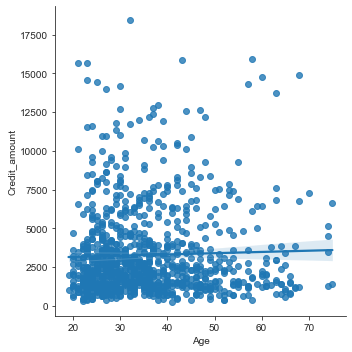

In [49]:
sns.lmplot(x = 'Age', y = 'Credit_amount', data = gc)

In [50]:
gc.columns

Index(['Creditability', 'Account_status', 'Duration_of_credit',
       'Payment_status_of_previous_credit', 'Purpose', 'Credit_amount',
       'Value_savings_stocks', 'Duration_of_current_employment',
       'Instalment_percent', 'Marital_status_gender', 'Guarantors',
       'Duration_in_current_address', 'Property', 'Age', 'Concurrent_credits',
       'Housing', 'No_of_credits_at_this_bank', 'Occupation',
       'No_of_dependents', 'Telephone', 'Foreign_worker'],
      dtype='object')

In [51]:
# Selecting final predictors for Machine Learning

gc2.head()

,Duration_of_credit,Credit_amount,Age,Duration_of_current_employment
0,-0.240857,-0.787657,-1.281573,-1.145978
1,-0.987573,-0.167384,0.040363,-0.317959
2,-0.738668,-0.861381,-1.105315,0.510060
3,-0.738668,-0.407341,0.304750,-0.317959
4,-0.738668,-0.389974,0.216621,-0.317959


In [52]:
from sklearn.model_selection import train_test_split

X = gc2[['Duration_of_credit','Age','Duration_of_current_employment']]   # Input/ independent features
y = gc['Credit_amount']                                               # Dependent feature

In [53]:
# Split the data into X_train, X_test, y_train, y_test with train_size=0.7/ test_size = 0.30 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=100) # Method 1
print("Dimensions of USAhousing dataset including Address feature  :", gc.shape)
print("Input attributes X - Train dataset :", Xtrain.shape)
print("Input attributes X - Test dataset  :", Xtest.shape)
print("Output attribute y - Train dataset :", ytrain.shape)
print("Output attribute y - Test dataset  :", ytest.shape)

Dimensions of USAhousing dataset including Address feature  : (1000, 21)
Input attributes X - Train dataset : (700, 3)
Input attributes X - Test dataset  : (300, 3)
Output attribute y - Train dataset : (700,)
Output attribute y - Test dataset  : (300,)


In [54]:
mlr = LinearRegression().fit(Xtrain,ytrain)

# Model the equation - Evaluate the model by checking out it's coefficients and interpret them
print("Intercept is                        :",mlr.intercept_)        # intercept_ gives Y-intercept value
print("Coefficients of the input features \n",mlr.coef_)              

Intercept is                        : 3359.705074584242
Coefficients of the input features 
 [1905.8935267   177.98063702 -217.19343076]


In [55]:
mlr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

#### Interpretation - Scientific Notation:         1.2e-6 = 0.0000012      5.48E+03 = 5482.52291

Credit_amount = 105.4 + 158.1 Duration_of_credit + 15.6 Age + -179.8 Length_of_current_employment

**Interpreting the coefficients**
1. Holding all other features fixed, a 1 unit increase in Duration_of_credit is associated with an increase in Credit_amount by    $158.1
2. Holding all other features fixed, a 1 unit increase in Age is associated with an increase of Credit_amount by $15.6
3. Holding all other features fixed, a 1 unit increase in Length_of_current_employment is associated with an decrease of          $-179.8 in Credit_amount

In [56]:
# Predict the data on test dataset - Validate the model developed using train dataset

predict_test = mlr.predict(Xtest)                                  # Predict for test dataset
df = pd.DataFrame({'Actual': ytest, 'Predicted': predict_test})   # Display Actual against Predicted values
df.head()

,Actual,Predicted
249,5248,3294.433394
353,3499,1918.329010
537,1455,677.365977
424,1829,2299.684811
564,4272,4717.593586


In [57]:
print("Accuracy of the model - R square                = ",mlr.score(Xtest,ytest))   # Check R2 value for the model 

# Evaluate the performance of algorithm/ model developed
print('Maximum error between original & predicted data = ', max_error(ytest, predict_test))
print('Mean Absolute Error (MAE)                       = ', mean_absolute_error(ytest, predict_test))
print('Mean squared error (MSE)                        = ', mean_squared_error(ytest, predict_test))
print('Root mean squared error (RMSE)                  = ', np.sqrt(mean_squared_error(ytest, predict_test)))

Accuracy of the model - R square                =  0.3218779561916397
Maximum error between original & predicted data =  6616.24228603882
Mean Absolute Error (MAE)                       =  1344.3807742216363
Mean squared error (MSE)                        =  3096274.6376442034
Root mean squared error (RMSE)                  =  1759.6234363193175


##### Interpretation

1. From the model developed, R2 value demostrates that in 32 percent of the cases Credit_amount is explained by the input          attributes ('Duration_of_credit','Age','Length_of_current_employment')  
2. This means algorithm is not very accurate but can still make reasonably good predictions because of the huge error in          predicting results

In [58]:
# Cross validation

from sklearn.model_selection import cross_val_score

r2 = cross_val_score(mlr,X,y,scoring='r2',cv=5)   # store 5 scores of r2 in the object r2                                                          # Indicator of how good the model is
r2

array([0.24556101, 0.50617024, 0.44310278, 0.369878  , 0.30713812])

**Interpretation**



In [59]:
# Hyperparameter Tuning Using Grid Search Cross-Validation

len(X.columns)                                                   # number of features in X
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)  # step 1: Create a cross-validation scheme
hyper_params = [{'n_features_to_select': list(range(1, 4))}]     # step 2: Specify range of hyperparameters to tune
mlr = LinearRegression()                                          # step 3: Perform grid search - specify model
mlr.fit(X, y)
rfe = RFE(mlr)    

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = 5)      
model_cv.fit(X, y)                                 # fit the model  
print("Best Number of features to select:",model_cv.best_params_)
print("Best R2 score:",model_cv.best_score_)

Best Number of features to select: {'n_features_to_select': 3}
Best R2 score: 0.3743700288839701


**Why Regularize?**

- One of the basic assumptions of a multiple linear regression model is that there should be no (or very less)                   multicollinearity among the feature variables. This essentially means that the feature variables should ideally have no or     very less correlation with each other.
- A high correlation between the two feature variables gives rise to several problems. If we include one of them in the model,   adding the other will have little or no impact on improving the model, but will only make the model more complex.
- This goes against the principle of 'parsimony' in model building, which dictates that a simpler model with fewer variables is   always preferred to a more complex model with too many features.
- In such a case the whole OLS model becomes less reliable as the coefficient estimates have high variance, i.e. they do not     generalize well to unseen data(also called the problem of overfitting).

In [60]:
gc.corr().style.background_gradient(cmap='coolwarm')

,Duration_of_credit,Credit_amount,Duration_of_current_employment,Age
Duration_of_credit,1.000000,0.624988,0.057381,-0.037550
Credit_amount,0.624988,1.000000,-0.008376,0.032273
Duration_of_current_employment,0.057381,-0.008376,1.000000,0.259116
Age,-0.037550,0.032273,0.259116,1.000000


The above matrix shows correlations among the features such that darker shades of red implying high positive correlation and darker shades of blue implying high negative correlations.

In the multiple linear models we built in the previous section, both features s1 and s2 came out as important features. However, we can see that they have a very high positive correlation of about 0.896. This is clearly inducing multicollinearity into the model.

To counter such issues, we can use regularization techniques which allow us to lower this variance of the model at the cost of adding some bias into it, such that the total error is reduced. Lower variance implies that the problem of overfitting is tackled automatically, as the model generalizes well to unseen data after regularization.

The regularization techniques work by adding penalty factors to the original OLS cost function such that high coefficient values are penalized, taking them closer to zero.

The features with significant coefficient values are identified after a regularization procedure and other insignificant features with near-zero coefficient values can be dropped. This also leads to what is called natural features selection, resulting in an overall parsimonious model.

There are many regularization techniques. Three most commonly used ones viz. Ridge, Lasso and Elastic Net

### Binary Logistic Regression

In [61]:
# Datasets       - Explanatory vs. Target features
# Split Datasets - train vs. test datasets



X = gc[['Duration_of_credit','Age','Duration_of_current_employment','Credit_amount']]   # Input/ independent features
y = gc1['Creditability_1']                                               # Dependent feature

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=100) # Method 1
print("Dimensions of USAhousing dataset including Address feature  :", gc.shape)
print("Input attributes X - Train dataset :", Xtrain.shape)
print("Input attributes X - Test dataset  :", Xtest.shape)
print("Output attribute y - Train dataset :", ytrain.shape)
print("Output attribute y - Test dataset  :", ytest.shape)

Dimensions of USAhousing dataset including Address feature  : (1000, 21)
Input attributes X - Train dataset : (700, 4)
Input attributes X - Test dataset  : (300, 4)
Output attribute y - Train dataset : (700,)
Output attribute y - Test dataset  : (300,)


In [62]:
model = LogisticRegression() # Build a Logisitc Regression Model
logmodel=model.fit(Xtrain,ytrain)
blr_predict = logmodel.predict(Xtest)                # Predict for test data values
blr_predict

print("Classification Report\n",classification_report(ytest,blr_predict))   # Evaluation Metrics
print("Confusion Matrix\n",confusion_matrix(ytest,blr_predict))
print("Model Accuracy is:",accuracy_score(ytest,blr_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.50      0.16      0.24        82
           1       0.75      0.94      0.83       218

    accuracy                           0.73       300
   macro avg       0.62      0.55      0.54       300
weighted avg       0.68      0.73      0.67       300

Confusion Matrix
 [[ 13  69]
 [ 13 205]]
Model Accuracy is: 0.7266666666666667


### kNN Classification Model

In [63]:
gc.columns

Index(['Creditability', 'Account_status', 'Duration_of_credit',
       'Payment_status_of_previous_credit', 'Purpose', 'Credit_amount',
       'Value_savings_stocks', 'Duration_of_current_employment',
       'Instalment_percent', 'Marital_status_gender', 'Guarantors',
       'Duration_in_current_address', 'Property', 'Age', 'Concurrent_credits',
       'Housing', 'No_of_credits_at_this_bank', 'Occupation',
       'No_of_dependents', 'Telephone', 'Foreign_worker'],
      dtype='object')

In [64]:
# Datasets       - Explanatory vs. Target features
# Split Datasets - train vs. test datasets


X = gc2[['Duration_of_credit','Age','Duration_of_current_employment','Credit_amount']]   # Input/ independent features
y = gc1['Creditability_1']                                               # Dependent feature

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=100) # Method 1
print("Dimensions of USAhousing dataset including Address feature  :", gc.shape)
print("Input attributes X - Train dataset :", Xtrain.shape)
print("Input attributes X - Test dataset  :", Xtest.shape)
print("Output attribute y - Train dataset :", ytrain.shape)
print("Output attribute y - Test dataset  :", ytest.shape)

Dimensions of USAhousing dataset including Address feature  : (1000, 21)
Input attributes X - Train dataset : (700, 4)
Input attributes X - Test dataset  : (300, 4)
Output attribute y - Train dataset : (700,)
Output attribute y - Test dataset  : (300,)


In [65]:
# KNN algorithm - Build a model that will be used to predict patients

knn       = KNeighborsClassifier(n_neighbors=5)              # Create KNN Object
knn_model = knn.fit(Xtrain, ytrain)             # Train the model

knn_pred = knn_model.predict(Xtest)             # Predict test data set

print("Accuracy score :",roc_auc_score(ytest, knn_pred))                  # Check performance of model with ROC Score
print("Model Accuracy is:",accuracy_score(ytest,knn_pred))
print("\nClassification Report\n",classification_report(ytest, knn_pred)) # Check performance with classification report

Accuracy score : 0.5584582680689193
Model Accuracy is: 0.69

Classification Report
               precision    recall  f1-score   support

           0       0.40      0.27      0.32        82
           1       0.76      0.85      0.80       218

    accuracy                           0.69       300
   macro avg       0.58      0.56      0.56       300
weighted avg       0.66      0.69      0.67       300



In [66]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Interpretation**

- From the classification report, it can be seen that the model has an average performance of around 47% ranging from             precision, recall, f1-score, and support
- Accuracy also shows in value of 64%
- Then for the AUC score, it can be seen that the value is around 56.5%

In [67]:
# Use Hyperparameter Tuning to Improve Model Performance - Because the performance of the model is low 

leaf_size   = list(range(1,50))    # List Hyperparameters that we want to tune
n_neighbors = list(range(1,30))    # Number of neighbors to use
p=[1,2]                            # Power parameter for the Minkowski metric. p=1 for manhattan_distance; & p=2 for euclidean_distance

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)  # Convert to dictionary

knn_2 = KNeighborsClassifier()                             # Create new KNN object

clf = GridSearchCV(knn_2, hyperparameters, cv=10)          # Use GridSearch

best_model = clf.fit(X,y)                                  # Fit the model

# Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 22


In [68]:
knn2_pred = best_model.predict(Xtest)                                      # Predict test data set

print("Accuracy score :",roc_auc_score(ytest, knn2_pred))                  # Check performance of model with ROC Score
print("Model Accuracy is:",accuracy_score(ytest,knn2_pred))
print("\nClassification Report\n",classification_report(ytest, knn2_pred)) # Check performance with classification report

Accuracy score : 0.5540389348847617
Model Accuracy is: 0.7333333333333333

Classification Report
               precision    recall  f1-score   support

           0       0.54      0.16      0.25        82
           1       0.75      0.95      0.84       218

    accuracy                           0.73       300
   macro avg       0.65      0.55      0.54       300
weighted avg       0.69      0.73      0.68       300



**Interpretation**

- From GridSearch, it can be seen that the best number of leaf_size is 1 
- Optimal distance method is Euclidean_distance or p = 2
- Most optimal number of K is 22
- Using Hyperparameters Tuning can improve model performance to 73%


### Decision Tree Classifier

In [69]:
# Datasets       - Explanatory vs. Target features
# Split Datasets - train vs. test datasets


X = gc2[['Duration_of_credit','Age','Duration_of_current_employment','Credit_amount']]   # Input/ independent features
y = gc1['Creditability_1']                                               # Dependent feature

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=100) # Method 1
print("Dimensions of USAhousing dataset including Address feature  :", gc.shape)
print("Input attributes X - Train dataset :", Xtrain.shape)
print("Input attributes X - Test dataset  :", Xtest.shape)
print("Output attribute y - Train dataset :", ytrain.shape)
print("Output attribute y - Test dataset  :", ytest.shape)

Dimensions of USAhousing dataset including Address feature  : (1000, 21)
Input attributes X - Train dataset : (700, 4)
Input attributes X - Test dataset  : (300, 4)
Output attribute y - Train dataset : (700,)
Output attribute y - Test dataset  : (300,)


In [70]:
dtree = DecisionTreeClassifier().fit(Xtrain,ytrain)

dt_predict = dtree.predict(Xtest)
dt_predict

print("Classification Report\n",classification_report(ytest,dt_predict))
print("Confusion Matrix\n",confusion_matrix(ytest,dt_predict))
print("Model Accuracy is:",accuracy_score(ytest,dt_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.28      0.28      0.28        82
           1       0.73      0.72      0.73       218

    accuracy                           0.60       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.60      0.60      0.60       300

Confusion Matrix
 [[ 23  59]
 [ 60 158]]
Model Accuracy is: 0.6033333333333334


In [71]:
# hyper parameter tuning
parameter={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6,7,8],
    "max_features":["auto","sqrt","log2"]
}
gscv=GridSearchCV(dtree,param_grid=parameter,cv=5,scoring="accuracy").fit(Xtrain,ytrain)
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'random'}

In [72]:
dt_predict = gscv.predict(Xtest)
print("Classification Report\n",classification_report(ytest,dt_predict))
print("Confusion Matrix\n",confusion_matrix(ytest,dt_predict))
print("Model Accuracy is:",accuracy_score(ytest,dt_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.35      0.10      0.15        82
           1       0.73      0.93      0.82       218

    accuracy                           0.70       300
   macro avg       0.54      0.51      0.49       300
weighted avg       0.63      0.70      0.64       300

Confusion Matrix
 [[  8  74]
 [ 15 203]]
Model Accuracy is: 0.7033333333333334


**Interpretation**
- Normal decision tree model gave the accuracy of 60%
- Hyperparameter tuning of Decision tree with criterion,splitter,max_depth,max_features increases
  the accuracy to 73%

### Random Forest Classifier Model

In [73]:
# Datasets       - Explanatory vs. Target features
# Split Datasets - train vs. test datasets



X = gc2[['Duration_of_credit','Age','Duration_of_current_employment','Credit_amount']]   # Input/ independent features
y = gc1['Creditability_1']                                              # Dependent feature

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=100) # Method 1
print("Dimensions of USAhousing dataset including Address feature  :", gc.shape)
print("Input attributes X - Train dataset :", Xtrain.shape)
print("Input attributes X - Test dataset  :", Xtest.shape)
print("Output attribute y - Train dataset :", ytrain.shape)
print("Output attribute y - Test dataset  :", ytest.shape)

Dimensions of USAhousing dataset including Address feature  : (1000, 21)
Input attributes X - Train dataset : (700, 4)
Input attributes X - Test dataset  : (300, 4)
Output attribute y - Train dataset : (700,)
Output attribute y - Test dataset  : (300,)


In [74]:
rfc = RandomForestClassifier(n_estimators=100).fit(Xtrain,ytrain)

rf_predict = rfc.predict(Xtest)
rf_predict

print("Classification Report\n",classification_report(ytest,rf_predict))
print("Confusion Matrix\n",confusion_matrix(ytest,rf_predict))
print("Model Accuracy is:",accuracy_score(ytest,rf_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.34      0.26      0.29        82
           1       0.74      0.81      0.78       218

    accuracy                           0.66       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.63      0.66      0.64       300

Confusion Matrix
 [[ 21  61]
 [ 41 177]]
Model Accuracy is: 0.66


In [75]:
# hyper parameter tuning
parameter={
    "criterion":["gini","entropy","log_loss"],
    "max_depth":[1,2,3,4,5,6,7,8],
    "max_features":["auto","sqrt","log2"],
    'n_estimators':[50,100,150,200,250]
}
gscv=GridSearchCV(rfc,param_grid=parameter,cv=5,scoring="accuracy").fit(Xtrain,ytrain)
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [76]:
rfc_predict = gscv.predict(Xtest)
print("Classification Report\n",classification_report(ytest,rfc_predict))
print("Confusion Matrix\n",confusion_matrix(ytest,rfc_predict))
print("Model Accuracy is:",accuracy_score(ytest,rfc_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.60      0.11      0.19        82
           1       0.74      0.97      0.84       218

    accuracy                           0.74       300
   macro avg       0.67      0.54      0.51       300
weighted avg       0.70      0.74      0.66       300

Confusion Matrix
 [[  9  73]
 [  6 212]]
Model Accuracy is: 0.7366666666666667


**Interpretation**
- Normal decision tree model gave the accuracy of 68%
- Hyperparameter tuning of Decision tree with criterion,n_estimator,max_depth,max_features increases
  the accuracy to 73%

### Adaboost Model

In [77]:
# Datasets       - Explanatory vs. Target features
# Split Datasets - train vs. test datasets


X = gc2[['Duration_of_credit','Age','Duration_of_current_employment','Credit_amount']]   # Input/ independent features
y = gc1['Creditability_1']                                              # Dependent feature

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=100) # Method 1
print("Dimensions of USAhousing dataset including Address feature  :", gc.shape)
print("Input attributes X - Train dataset :", Xtrain.shape)
print("Input attributes X - Test dataset  :", Xtest.shape)
print("Output attribute y - Train dataset :", ytrain.shape)
print("Output attribute y - Test dataset  :", ytest.shape)

Dimensions of USAhousing dataset including Address feature  : (1000, 21)
Input attributes X - Train dataset : (700, 4)
Input attributes X - Test dataset  : (300, 4)
Output attribute y - Train dataset : (700,)
Output attribute y - Test dataset  : (300,)


In [78]:
ab=AdaBoostClassifier(n_estimators=100)                              # Build the model
ab.fit(Xtrain,ytrain)                   # Fit the model on training dataset X & y attributes

ab_predict = ab.predict(Xtest)
ab_predict

print("Classification Report\n",classification_report(ytest,ab_predict))
print("Confusion Matrix\n",confusion_matrix(ytest,ab_predict))
print("Model Accuracy is:",accuracy_score(ytest,ab_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.22      0.30        82
           1       0.76      0.91      0.82       218

    accuracy                           0.72       300
   macro avg       0.61      0.56      0.56       300
weighted avg       0.68      0.72      0.68       300

Confusion Matrix
 [[ 18  64]
 [ 20 198]]
Model Accuracy is: 0.72


### Clustering Model

**Elbow Method - variance explained by the clusters is plotted against the no. of clusters**

In [79]:
# Elbow Method - variance explained by the clusters is plotted against the no. of clusters

cluster_error = []
cluster_range = range(1,10)
for i in cluster_range:
    clust = KMeans(i).fit(gc2)
    cluster_error.append(clust.inertia_)  # inertia_ in python - wcss

Text(0.5, 1.0, 'Elbow Diagram')

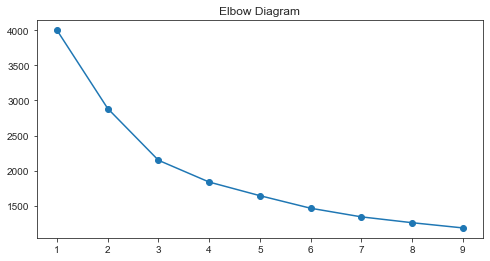

In [80]:
# Plot - Elbow method outcome

plt.figure(figsize=(8,4))
plt.plot(cluster_range, cluster_error, marker = "o")
plt.title("Elbow Diagram")

**Interpretation**

- Elbow point is at 3
- Indicates that there might be 3 clusters existing in the dataset 

In [81]:
# Set K=3 & run KMeans algorithm - Create a new column clusterid to capture the cluster number it is assigned to 

clust2 = KMeans(n_clusters=3, random_state = 42).fit(gc2)
gc["clusterid"] = clust2.labels_ 
gc.head()

,Creditability,Account_status,Duration_of_credit,Payment_status_of_previous_credit,Purpose,Credit_amount,Value_savings_stocks,Duration_of_current_employment,Instalment_percent,Marital_status_gender,...,Property,Age,Concurrent_credits,Housing,No_of_credits_at_this_bank,Occupation,No_of_dependents,Telephone,Foreign_worker,clusterid
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,1
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,1
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,1


In [82]:
accuracy=silhouette_score(gc2,clust2.labels_)
print(accuracy)

0.30453420003943077


In [83]:
# Print dimensions of each new cluster created

print("Cluster 0 Dimensions: \t",gc[gc.clusterid==0].shape)
print("Cluster 1 Dimensions: \t",gc[gc.clusterid==1].shape)
print("Cluster 2 Dimensions: \t",gc[gc.clusterid==2].shape)

Cluster 0 Dimensions: 	 (173, 22)
Cluster 1 Dimensions: 	 (511, 22)
Cluster 2 Dimensions: 	 (316, 22)


**Interpretation - 

- Cluster 0 (316 instances)
- Cluster 1 (173 instances)
- Cluster 2 (511 instances)

**Hierarchical clustering - Store cluster labels in varible h_clusterid**

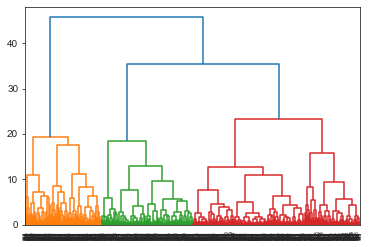

In [84]:
dendrogram = sch.dendrogram(sch.linkage(gc2,method="ward"))

**Interpretation**
Here with the help of Dendrogram we can say that the optimal number of clusters can be 3

In [85]:


h_clusters = AgglomerativeClustering(n_clusters=3).fit(gc2)
gc["h_clusterid"] = h_clusters.labels_ 
gc[0:5]

,Creditability,Account_status,Duration_of_credit,Payment_status_of_previous_credit,Purpose,Credit_amount,Value_savings_stocks,Duration_of_current_employment,Instalment_percent,Marital_status_gender,...,Age,Concurrent_credits,Housing,No_of_credits_at_this_bank,Occupation,No_of_dependents,Telephone,Foreign_worker,clusterid,h_clusterid
0,1,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,1,1,1,1,0
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,2,1,1,1,0
2,1,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,1,1,1,1,0
3,1,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,2,1,2,1,0
4,1,1,12,4,0,2171,1,3,4,3,...,38,1,2,2,2,1,1,2,1,0


In [86]:
# Print dimensions of each new cluster created

print("Cluster 0 Dimensions: \t",gc[gc.h_clusterid==0].shape)
print("Cluster 1 Dimensions: \t",gc[gc.h_clusterid==1].shape)
print("Cluster 2 Dimensions: \t",gc[gc.h_clusterid==2].shape)

Cluster 0 Dimensions: 	 (499, 23)
Cluster 1 Dimensions: 	 (227, 23)
Cluster 2 Dimensions: 	 (274, 23)


In [87]:
accuracy=silhouette_score(gc2,h_clusters.labels_)
print(accuracy)

0.26004629457346506


**Interpretation - 

- Cluster 0 (499 instances)
- Cluster 1 (227 instances)
- Cluster 2 (274 instances)